Partie 1

In [78]:
import pandas as pd
#-------------------------------------------------------------------
data = pd.read_csv("/home/issa/Téléchargements/scorm_tracking_copy(1).csv",sep=';')
#Grouper les modules par nombre d'actor
serieNbActor = pd.Series(data.groupby('object_id').actor.nunique()).rename('NbActor')
#Grouper par module en precisant le nombre de cession
serieNbCession = pd.Series(data.groupby('object_id').session_uuid.count()).rename('NbCession')
##Grouper les modules par score maximum
serieMaxScore = pd.Series(data.groupby('object_id').score.max()).rename('MaxScore')
#Grouper les modules par score minimum
serieMinScore = pd.Series(data.groupby('object_id').score.min()).rename('MinScore')
#Grouper les modules par score >= 50
serieNbActor50 = data[(data['score'] >= 50)].groupby(['object_id']).actor.nunique().rename('NbActor50')
#Calcul du taux de reussite
serieTauxReussite = (serieNbActor50/serieNbActor)*100
serieTauxReussite =serieTauxReussite.rename('TauxReussite')
#Concatenation des resultats ci-dessus
resultatFinal = pd.concat([serieNbActor,serieNbCession,serieMinScore,serieMaxScore,serieTauxReussite],axis=1)
#Trier le resultat final par ordre decroissante
resultatFinalTout = resultatFinal.sort_values(by=['TauxReussite'],ascending=False)
resultatFinalTout.TauxReussite = resultatFinalTout.TauxReussite.fillna(0)
#--------------------------------------------------------------------
resultatFinalTop10 = resultatFinalTout[:10]

#import numpy as np
resultatFinalTop10Numpy = resultatFinalTop10.reset_index().values
resultatFinalTop10Numpy
resultatFinalTout
resultatFinalTop10

,NbActor,NbCession,MinScore,MaxScore,TauxReussite
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,0.0,100.0,99.186992
734-risques-psychosociaux,124,153,0.0,100.0,98.387097
819-informatique,59,68,0.0,100.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,0.0,100.0,97.872340
761-fallstudien-und-fragen,89,242,0.0,100.0,97.752809
766-unbezahlter-urlaub,88,188,0.0,100.0,97.727273
765-urlaub,88,308,0.0,100.0,97.727273
729-salaire,129,255,0.0,100.0,97.674419
747-modification-des-rapports-de-travail,124,242,0.0,100.0,97.580645


Partie 2

In [4]:
df2 = resultatFinalTout.reset_index().values
#df2[0][0]
#Groupement des (nb cession, temps, score) du top module par apprenant
nbCessionActorTop = data[(data['object_id'] == df2[0][0] )].groupby('actor').session_uuid.count().rename('NbCession')
nbTempsActorTop = data[(data['object_id'] == df2[0][0] )].groupby('actor').temps.sum().rename('NbTemp')
nbScoreActorTop = data[(data['object_id'] == df2[0][0] )].groupby('actor').score.max().rename('ScoreMax')

data2Top = pd.concat([nbCessionActorTop,nbTempsActorTop,nbScoreActorTop], axis = 1)
#Création et attribution du resultat final de chaque apprenant
data2Top = data2Top.assign(ResultatFinal=0)
data2Top.loc[data2Top['ScoreMax'] >= 50, 'ResultatFinal'] = 1
#data2Top

#df2[-1][0]
#Groupement des (nb cession, temps, score) du dernier module par apprenant
nbCessionActorBottom = data[(data['object_id'] == df2[-1][0] )].groupby('actor').session_uuid.count().rename('NbCession')
nbTempsActorBottom = data[(data['object_id'] == df2[-1][0] )].groupby('actor').temps.sum().rename('NbTemp')
nbScoreActorBottom = data[(data['object_id'] == df2[-1][0] )].groupby('actor').score.max().rename('ScoreMax')

data2Bottom = pd.concat([nbCessionActorBottom,nbTempsActorBottom,nbScoreActorBottom], axis = 1)
data2Bottom = data2Bottom.assign(ResultatFinal=0)
data2Bottom.loc[data2Bottom['ScoreMax'] >= 50, 'ResultatFinal'] = 1
#data2Bottom

resultat2 = pd.concat([data2Top,data2Bottom])
resultat2

,NbCession,NbTemp,ScoreMax,ResultatFinal
actor,,,,
dtic@mobiletic.com,4,1546.0,83.0,1
ga2018_05n7@yopmail.com,1,425.0,67.0,1
ga2018_096a@yopmail.com,4,481.0,100.0,1
ga2018_0buu@yopmail.com,1,236.0,67.0,1
ga2018_0hot@yopmail.com,1,449.0,67.0,1
...,...,...,...,...
ga2018_tlqd@yopmail.com,1,145.0,0.0,0
ga2018_x19w@yopmail.com,1,9.0,0.0,0
ga2018_zf30@yopmail.com,1,13.0,0.0,0


In [101]:
def representation_info_module(donnee,module):
    nbTempsActor = donnee[(donnee['object_id'] == module)].groupby('actor').temps.sum().rename('NbTemp')
    nbScoreActor = donnee[(donnee['object_id'] == module )].groupby('actor').score.max().rename('ScoreMax')

    data = pd.concat([nbScoreActor,nbTempsActor], axis = 1)
    data = data.sort_values(by=['NbTemp'],ascending=True)
#Création et attribution du resultat final de chaque apprenant
    plt.plot(data.NbTemp/60,data.ScoreMax,label=module)

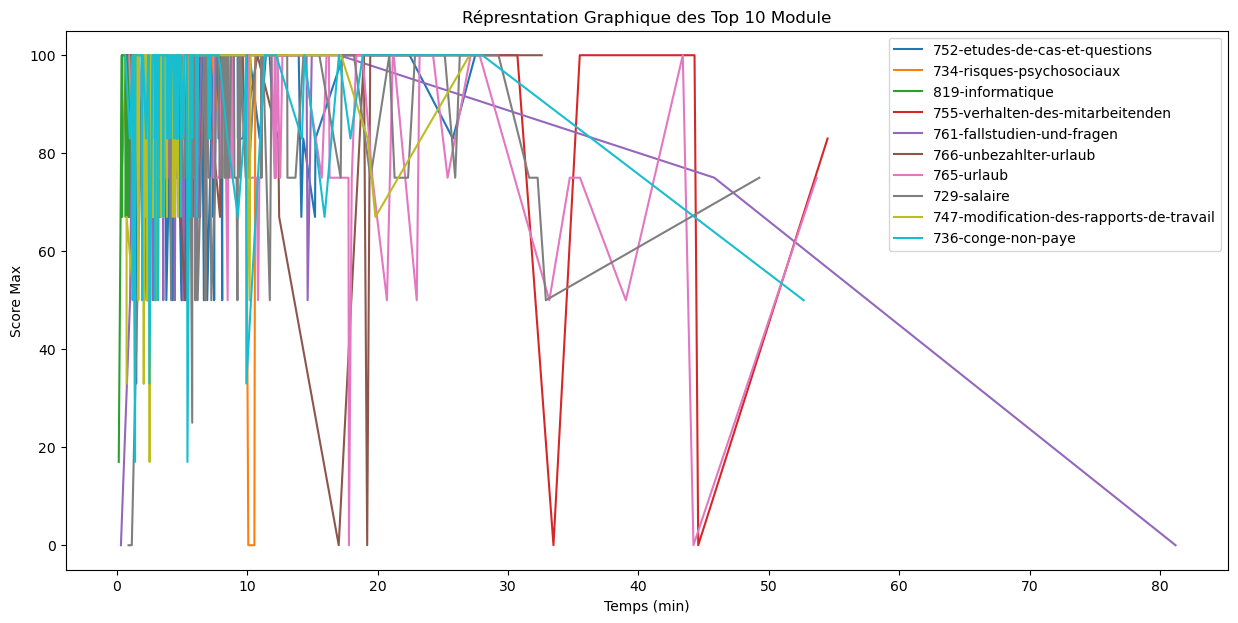

In [82]:
import matplotlib.pyplot as plt

df2 = resultatFinalTout.reset_index().values
plt.figure(figsize=(15,7))
for i in range(10):
    representation_info_module(data,df2[i][0])

plt.xlabel('Temps (min)')
plt.title('Répresntation Graphique des Top 10 Module')
plt.ylabel('Score Max')
plt.legend()
plt.show()

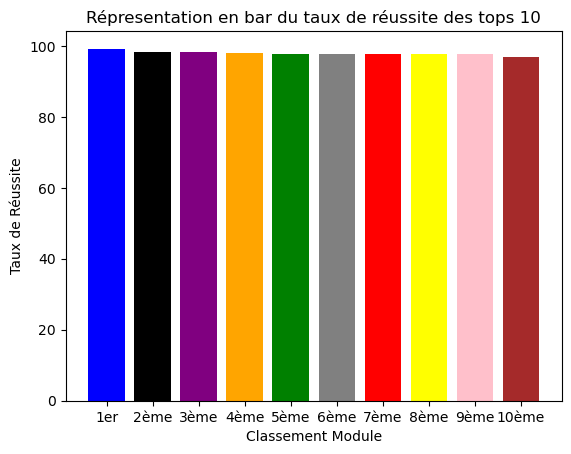

In [42]:
import matplotlib.pyplot as plt

x = ['1er','2ème','3ème','4ème','5ème','6ème','7ème','8ème','9ème','10ème']
plt.figure()
couleur = ['blue','black','purple','orange','green','grey','red','yellow','pink','brown']
plt.bar(x,resultatFinalTop10.TauxReussite, color=couleur)
plt.xlabel('Classement Module')
plt.ylabel('Taux de Réussite')
plt.title('Répresentation en bar du taux de réussite des tops 10')
plt.show()

In [98]:
def rep_info_module_selon_rang_score(donnee,module,ligne,colonne,position):
    import matplotlib.pyplot as plt
    
    nbScoreActor = donnee[(donnee['object_id'] == module )].groupby('actor').score.max().rename('ScoreMax')

    data = pd.DataFrame(nbScoreActor)
    data = data.sort_values(by=['ScoreMax'],ascending=False)
    x = list(range(1,len(data.ScoreMax)+1))
    plt.subplot(ligne,colonne,position)
    plt.plot(x,data.ScoreMax,label=module)
    
    plt.xlabel('Rang')
    plt.ylabel('Score Max')
    plt.legend()

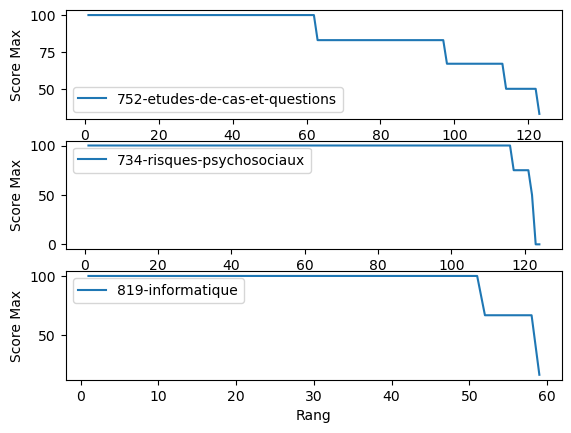

In [99]:
import matplotlib.pyplot as plt

df2 = resultatFinalTout.reset_index().values
#couleur = ['blue','black','purple']
for i in range(3):
    rep_info_module_selon_rang_score(data,df2[i][0],3,1,i+1)
    
plt.show()

In [96]:
def rep_info_module_selon_rang_temps(donnee,module):
    import matplotlib.pyplot as plt
    
    nbTempsActor = donnee[(donnee['object_id'] == module)].groupby('actor').temps.sum().rename('NbTemp')
    #nbScoreActor = donnee[(donnee['object_id'] == module )].groupby('actor').score.max().rename('ScoreMax')
    data = pd.DataFrame(nbTempsActor)
    #data = data.sort_values(by=['ScoreMax'],ascending=False)
    x = list(range(1,len(data.NbTemp)+1))
    plt.scatter(x,data.NbTemp/60,label=module)

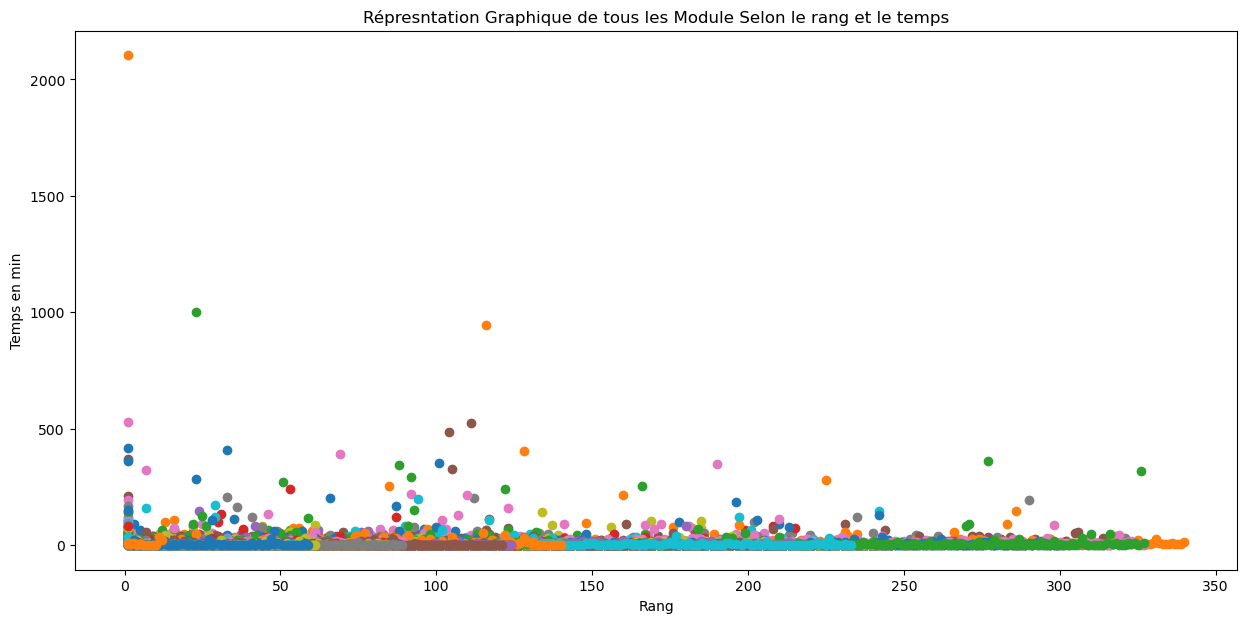

In [97]:
import matplotlib.pyplot as plt

df2 = resultatFinalTout.reset_index().values
plt.figure(figsize=(15,7))
for i in range(len(df2)):
    rep_info_module_selon_rang_temps(data,df2[i][0])

plt.xlabel('Rang')
plt.title('Répresntation Graphique de tous les Module Selon le rang et le temps')
plt.ylabel('Temps en min')
#plt.legend()
plt.show()

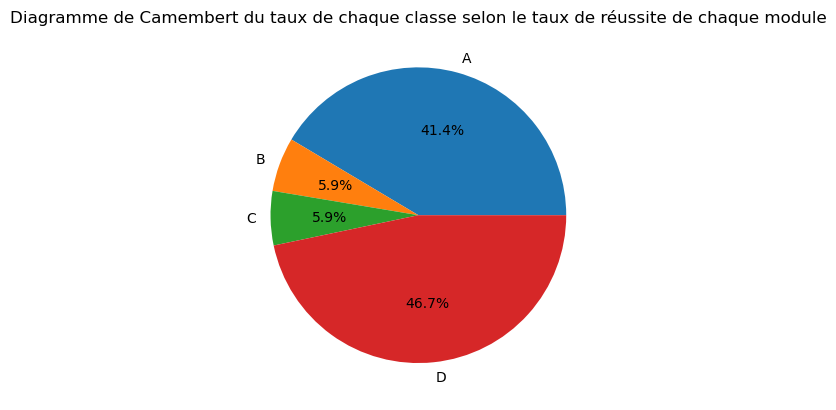

In [72]:
classeA = (len(resultatFinalTout[resultatFinalTout['TauxReussite'] >= 80])/len(resultatFinalTout))*100
classeB = (len(resultatFinalTout.loc[(resultatFinalTout['TauxReussite'] >= 60) & (resultatFinalTout['TauxReussite'] <80)])/len(resultatFinalTout))*100
classeC = (len(resultatFinalTout.loc[(resultatFinalTout['TauxReussite'] >= 50) & (resultatFinalTout['TauxReussite'] < 60)])/len(resultatFinalTout))*100
classeD = (len(resultatFinalTout[resultatFinalTout['TauxReussite'] < 50])/len(resultatFinalTout))*100

resultat = [classeA,classeB,classeC,classeD]
plt.pie(resultat, labels=['A','B','C','D'], normalize=True,autopct='%1.1f%%')
plt.title('Diagramme de Camembert du taux de chaque classe selon le taux de réussite de chaque module');